In [61]:
import pandas as pd
df= pd.read_csv('/content/pima-indians-diabetes.csv'
,names=['pregnant', 'plasma','pressure','thickness','insulin','BMI','pedigree','age','classs'])
print(df.head(10))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  classs
0         6     148        72         35        0  33.6     0.627   50       1
1         1      85        66         29        0  26.6     0.351   31       0
2         8     183        64          0        0  23.3     0.672   32       1
3         1      89        66         23       94  28.1     0.167   21       0
4         0     137        40         35      168  43.1     2.288   33       1
5         5     116        74          0        0  25.6     0.201   30       0
6         3      78        50         32       88  31.0     0.248   26       1
7        10     115         0          0        0  35.3     0.134   29       0
8         2     197        70         45      543  30.5     0.158   53       1
9         8     125        96          0        0   0.0     0.232   54       1


In [62]:
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,classs
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   classs     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [64]:
#혈압과 당뇨병 발병 여부만 살펴보기 
print(df[['pressure','classs']])

     pressure  classs
0          72       1
1          66       0
2          64       1
3          66       0
4          40       1
..        ...     ...
763        76       0
764        70       0
765        72       0
766        60       1
767        70       0

[768 rows x 2 columns]


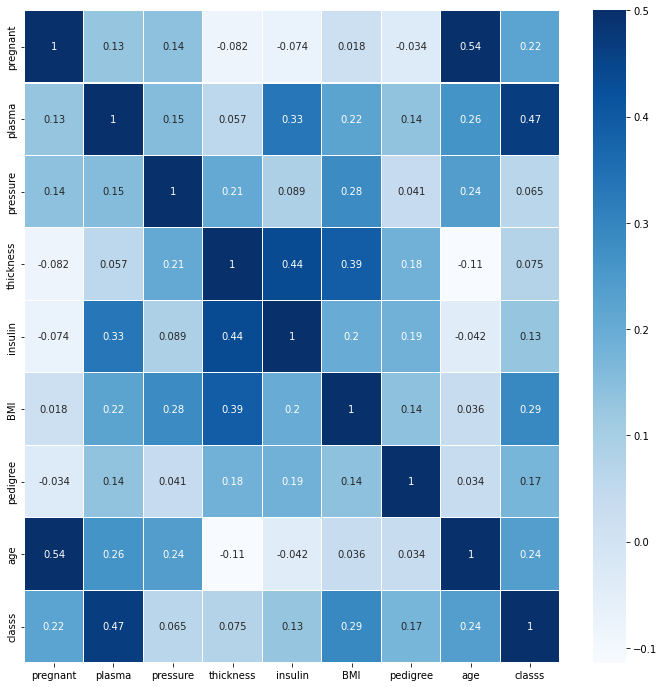

In [65]:
#그래프형으로 데이터 표현하기(matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df= pd.read_csv('/content/pima-indians-diabetes.csv'
,names=['pregnant', 'plasma','pressure','thickness','insulin','BMI','pedigree','age','classs'])
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True,linewidths=0.1, vmax=0.5,
           cmap='Blues',linecolor='white')
plt.show()

In [66]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,classs
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
classs,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


당뇨병 발병 여부를 가리키는 classs항목을 기준으로 각 속성(정보)과의 상관도를 살펴보면 plasma속성(공복 혈당 농도)이 상관관계가 가장 높다는 것을 알 수 있다 


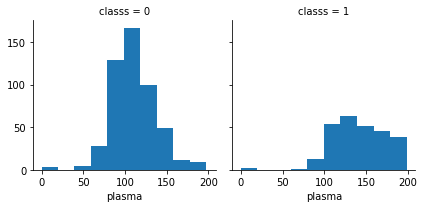

In [67]:
grid= sns.FacetGrid(df, col='classs')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

당뇨병 환자의 경우 plasma 항목의 수치가 150이상인 경우가 많다는 것을 알 수 있다. 


In [68]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

#seed 값 생성 
seed= 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [69]:
dataset= numpy.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")
X= dataset[:, 0:8]
Y= dataset[:,8]

In [70]:
#모델 설계하기 

model = tf.keras.models.Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
#모델 학습 과정 설정하기
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
#모델 학습시키기(실행하기)
model.fit(X,Y, batch_size=10, epochs=200)

#결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7669
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7682
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7695
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7721
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7669
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7799
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7669
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7734
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7721
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7878
Epoch 11/